**PRiAD sprawdzian**

# Sprawdzian z Podstaw Reprezentacji i Analizy Danych

**Instrukcja ogólna**

1. Uzupełnij swoje dane osobowe (imię, nazwisko, numer indeksu) w pierwszej komórce kodu.
2. Nie zmieniaj kodu oznaczonego komentarzem `# TEGO KODU NIE ZMIENIAJ`.
3. Wypełniaj kod wyłącznie w komórkach oznaczonych komentarzem **`TU NAPISZ SWÓJ KOD`**.
4. Wszystkie wyniki liczbowe wpisuj do odpowiednich pól słownika `results`.
5. Na końcu uruchom komórkę zapisującą `results` do pliku CSV.

Maksymalna liczba punktów: **20**

- Zadanie 1 – Analiza eksploracyjna (EDA): **5 pkt**  
- Zadanie 2 – Wizualizacja i wnioski: **5 pkt** (ocena ręczna)  
- Zadanie 3 – Klasyfikacja: **5 pkt**  
- Zadanie 4 – Grupowanie: **5 pkt**



In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score  # w tym notatniku już nie używany, ale może być zaimportowany


In [18]:
# ======================
# DANE STUDENTA – UZUPEŁNIJ
# ======================

imie = "IMIĘ"          # <-- wpisz swoje imię (string)
nazwisko = "NAZWISKO"  # <-- wpisz swoje nazwisko (string)
indeks = 123456        # <-- wpisz swój 6-cyfrowy numer indeksu (int)


In [19]:
# ======================
# TEGO KODU NIE ZMIENIAJ
# ======================


np.random.seed(indeks)
pakiet_filename = f"sprawdzian_dane.csv"
df = pd.read_csv(pakiet_filename)
print("\nPodgląd danych:")
df.head()




Podgląd danych:


,atrybut1,atrybut2,atrybut3,atrybut4,atrybut5,atrybut6,class
0,62.495606,88.058560,33.091818,3.313183,1958.833468,10.850609,class 3
1,65.476066,81.302104,4.171545,3.982742,2121.359551,13.368151,class 3
2,30.087409,24.773440,2.818846,0.256822,1066.482549,8.468432,class 1
3,38.566590,33.465276,17.697918,0.291883,1004.830874,9.651596,class 1
4,59.188268,95.754309,93.793837,2.571297,1862.154467,9.157227,class 3


In [20]:
# ======================
# STRUKTURA WYNIKÓW – TEGO KODU NIE ZMIENIAJ
# ======================

results = {
    "imie": imie,
    "nazwisko": nazwisko,
    "indeks": indeks,
    
    # EDA – 10 wartości
    "eda_num_rows": None,
    "eda_num_attributes": None,
    "eda_total_missing": None,
    "eda_num_rows_with_missing": None,
    "eda_num_column_with_missing": None,
    "eda_num_classes": None,

    # Klasyfikacja – kNN (różne k) + drugi klasyfikator
    "cls_knn_k1_accuracy": None,
    "cls_knn_k5_accuracy": None,
    "cls_knn_k9_accuracy": None,
    "cls_knn_k11_accuracy": None,
    "cls_knn_best_k": None,
    "cls_knn_best_accuracy": None,

    # Grupowanie – k-średnich, średnie odległości do centroidów dla k=2..8
    "clu_kmeans_mean_dist_k2": None,
    "clu_kmeans_mean_dist_k3": None,
    "clu_kmeans_mean_dist_k4": None,
  "clu_kmeans_mean_dist_k5": None
}  

results


{'imie': 'IMIĘ',
 'nazwisko': 'NAZWISKO',
 'indeks': 123456,
 'eda_num_rows': None,
 'eda_num_attributes': None,
 'eda_total_missing': None,
 'eda_num_rows_with_missing': None,
 'eda_num_column_with_missing': None,
 'eda_num_classes': None,
 'cls_knn_k1_accuracy': None,
 'cls_knn_k5_accuracy': None,
 'cls_knn_k9_accuracy': None,
 'cls_knn_k11_accuracy': None,
 'cls_knn_best_k': None,
 'cls_knn_best_accuracy': None,
 'clu_kmeans_mean_dist_k2': None,
 'clu_kmeans_mean_dist_k3': None,
 'clu_kmeans_mean_dist_k4': None,
 'clu_kmeans_mean_dist_k5': None}

## Zadanie 1 (5 pkt) – Analiza eksploracyjna i statystyki opisowe

Dany jest zbiór danych zawierający atrybuty opisowe (`attr1`, `attr2`, …) oraz
atrybut decyzyjny `class`.

**Wykonaj następujące działania:**

1. Ustal:
   1. liczbę obserwacji (wierszy) w zbiorze,
   2. liczbę atrybutów **opisujących** (bez kolumny `class`).


2. Zbadaj braki danych:
   1. wyznacz łączną liczbę braków (`NaN`) w całym zbiorze,
   2. wyznacz liczbę wierszy zawierających co najmniej jeden brak danych,
   3. dla każdej kolumny policz liczbę braków i wskaż nazwę kolumny,
      w której braków jest najwięcej.


3. Ustal liczbę różnych klas w atrybucie `class`.


4. Dla wszystkich atrybutów opisowych (bez `class`) oblicz:
   - rozstęp (max – min),
   - rozstęp międzykwartylowy (IQR = Q3 – Q1),
   - wariancję,
   - średnią.




**Wyniki liczbowe wpisz do pól słownika `results`:**

- `eda_num_rows`             - liczba obiektów
- `eda_num_attributes`       - liczba atrybutów 
- `eda_total_missing`        - liczba braków
- `eda_num_rows_with_missing`- liczba wierszy zawierających co najmniej 1 brak
- `eda_num_column_with_missing`  - liczba kolumn zawierających co najmniej 1 brak
- `eda_num_classes`          - kolumna o największej liczbie braków



In [21]:

# ----------------------
# ZADANIE 1 – ANALIZA EKSPLORACYJNA
# ----------------------

# 1) Kolumny opisujące (bez 'class')
feature_cols = [c for c in df.columns if c != "class"]

# 2) Liczba obiektów i liczba atrybutów opisujących
eda_num_rows = int(df.shape[0])
eda_num_attributes = int(len(feature_cols))

# 3) Braki danych
eda_total_missing = int(df.isna().sum().sum())
eda_num_rows_with_missing = int(df.isna().any(axis=1).sum())
missing_per_col = df.isna().sum()
eda_num_column_with_missing = int((missing_per_col > 0).sum())

# 4) Liczba klas w 'class' (pomijamy NaN, jeśli występują)
eda_num_classes = int(df["class"].dropna().nunique()) if "class" in df.columns else 0

# 5) Statystyki opisowe dla atrybutów opisowych (podgląd)
print("Statystyki opisowe (cechy):")
display(df[feature_cols].describe(include="all"))

print("\nBraki w kolumnach (malejąco):")
display(missing_per_col.sort_values(ascending=False))


Statystyki opisowe (cechy):


,atrybut1,atrybut2,atrybut3,atrybut4,atrybut5,atrybut6
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,44.857368,49.999387,28.543892,1.419141,1579.727877,11.098237
std,13.952695,29.924082,18.355536,0.860344,504.830540,2.553185
min,21.471815,11.163139,0.742100,-0.012949,786.173245,3.843451
25%,31.837835,25.062434,15.091103,0.616297,1051.709038,9.379091
50%,44.232531,36.139320,24.918793,1.394092,1577.338959,10.838492
75%,55.309544,83.472692,37.329407,2.006526,1985.819675,12.570159
max,85.313843,114.822199,123.954443,3.982742,3804.579829,21.611168



Braki w kolumnach (malejąco):


atrybut1    0
atrybut2    0
atrybut3    0
atrybut4    0
atrybut5    0
atrybut6    0
class       0
dtype: int64

In [22]:

# 6. Na końcu wpisz wszystkie wyliczone wartości do 'results'
#    TEN FRAGMENT KODU MASZ GOTOWY PONIŻEJ - WYSTARCZY ZAMIENIĆ
#    'None' W KAŻDEJ LINIJCE NA TWÓJ KOD

results["eda_num_rows"] = eda_num_rows
results["eda_num_attributes"] = eda_num_attributes
results["eda_total_missing"] = eda_total_missing
results["eda_num_rows_with_missing"] = eda_num_rows_with_missing
results["eda_num_column_with_missing"] = eda_num_column_with_missing
results["eda_num_classes"] = eda_num_classes

# sprawdzenie wartości
print("Wyniki EDA:")
for k in results:
    if k.startswith("eda_"):
        print(k, "=", results[k])


Wyniki EDA:
eda_num_rows = 450
eda_num_attributes = 6
eda_total_missing = 0
eda_num_rows_with_missing = 0
eda_num_column_with_missing = 0
eda_num_classes = 3


## Zadanie 2 (5 pkt) – Wizualizacja danych i wnioski

Na podstawie zbioru danych wykonaj następujące wizualizacje:

1. **Histogramy** wybranych atrybutów opisowych (co najmniej 3 atrybuty).
2. **Wykresy pudełkowe (boxplot)** dla kilku atrybutów (co najmniej 3, różniące się od siebie),
   w tym przynajmniej jeden wykres pokazujący rozkład wartości atrybutu w podziale na klasy `class`.
3. **Macierz wykresów punktowych** zawierającą wykresy punktowe wszystkich par atrybutów
4. **Wykresy punktowe (scatter plot)** prezentujące zależność pomiędzy
   wybranymi parami atrybutów (co najmniej 4 wykresy), z zaznaczeniem klas
   (np. kolorem), wykresy powinny pokazywać atrybuty dla których jest łatwo i trudno rozróżnić klasy, oraz o silnej i słabej korelacji


W osobnej komórce tekstowej (Markdown) sformułuj **wnioski z wizualizacji**:
1. jak oceniasz zmienność i rozproszenie poszczególnych atrybutów.
2. czy i gdzie widać wartości odstające (outliers),
3. czy rozkłady są w przybliżeniu symetryczne, czy wyraźnie skośne,
4. które atrybuty są silnie, a które słabo skorelowane,
5. które atrybuty wydają się dobrze rozróżniać klasy,
6. czy atrybuty mają bardzo różne skale (różne rzędy wielkości)
   i czy dane wymagają normalizacji/standaryzacji przed klasyfikacją i grupowaniem

UWAGA: W każdym wniosku wskaż wykres, na podstawie którego go sformułowałeś !

Ta część jest oceniana **ręcznie** (5 pkt).  
W tej części **nie zmieniasz** słownika `results`.


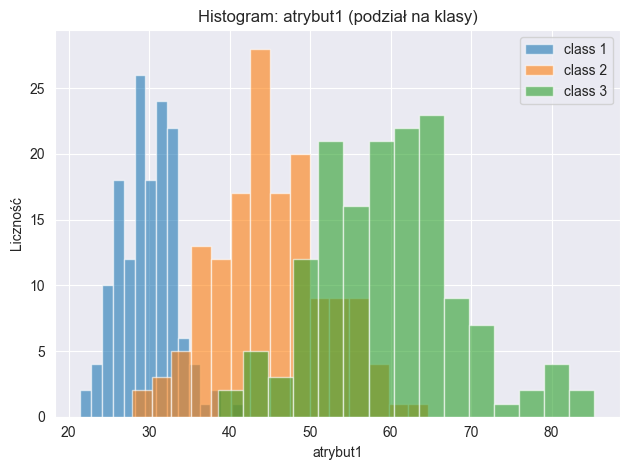

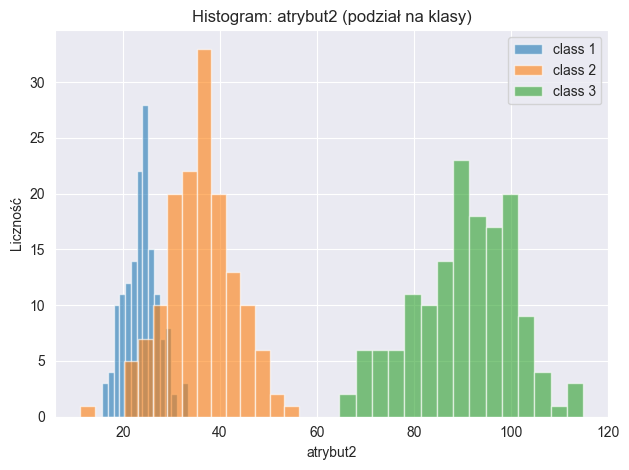

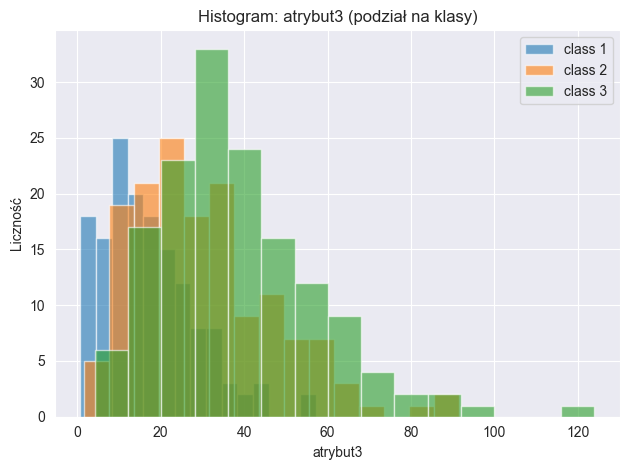

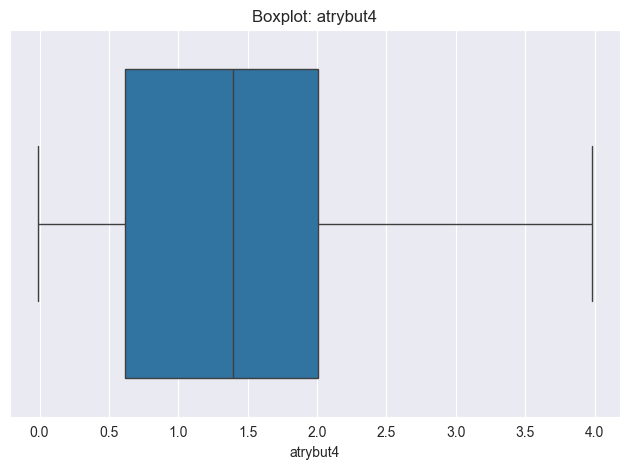

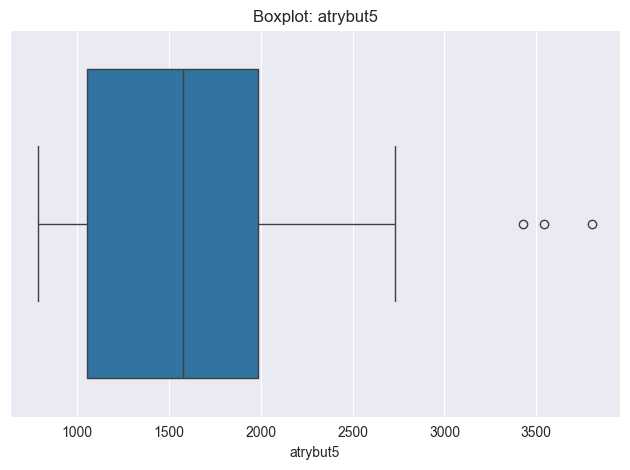

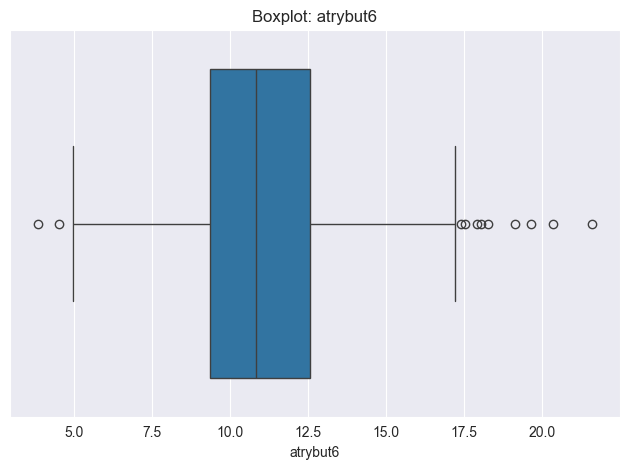

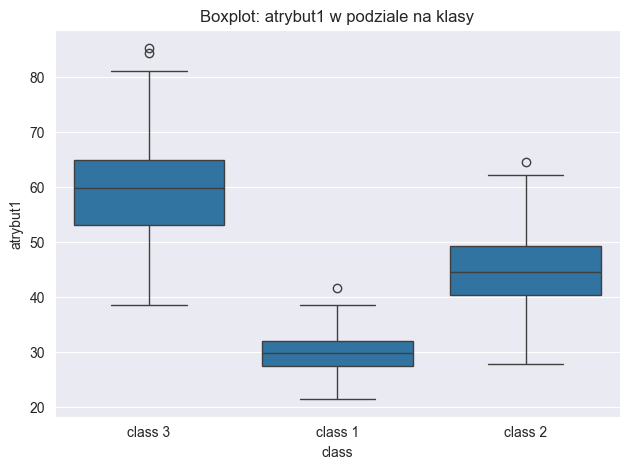

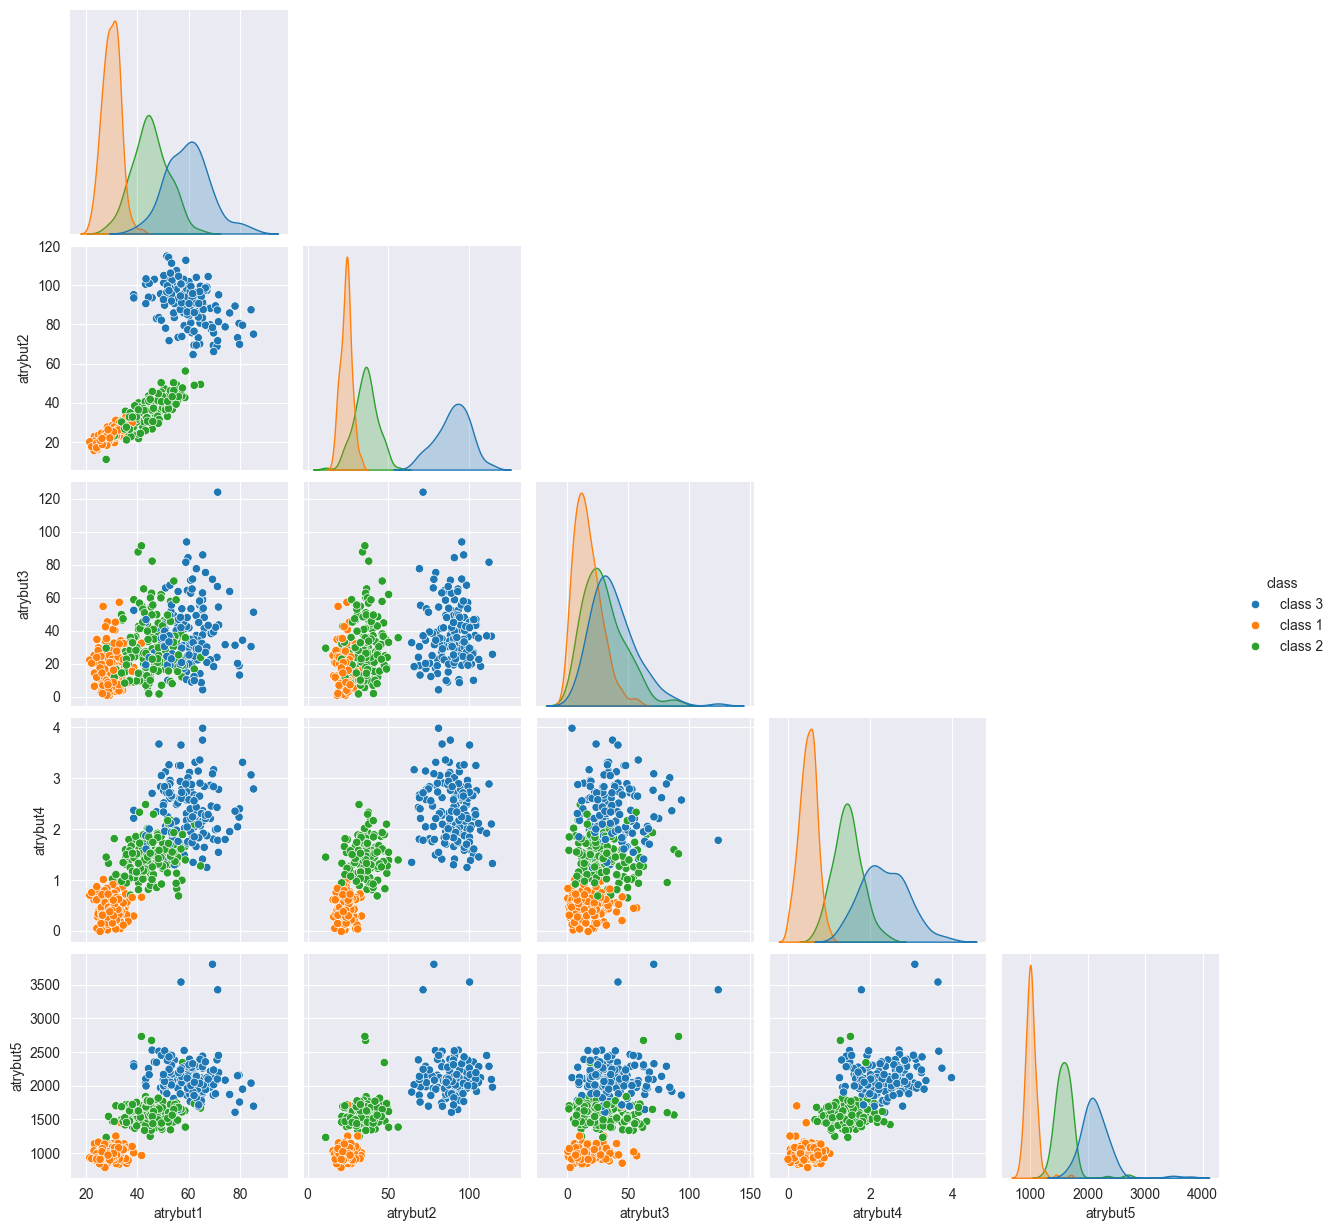

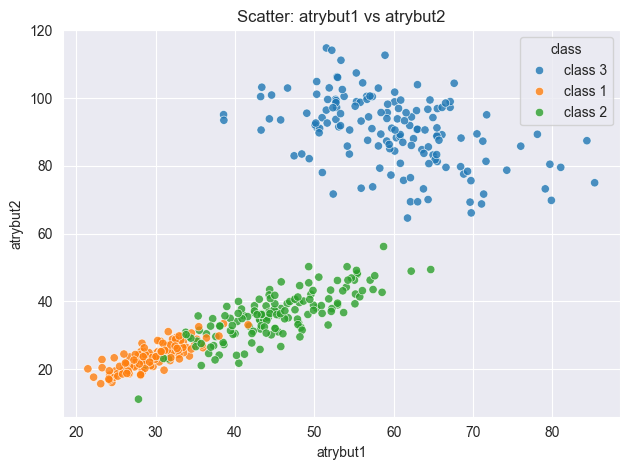

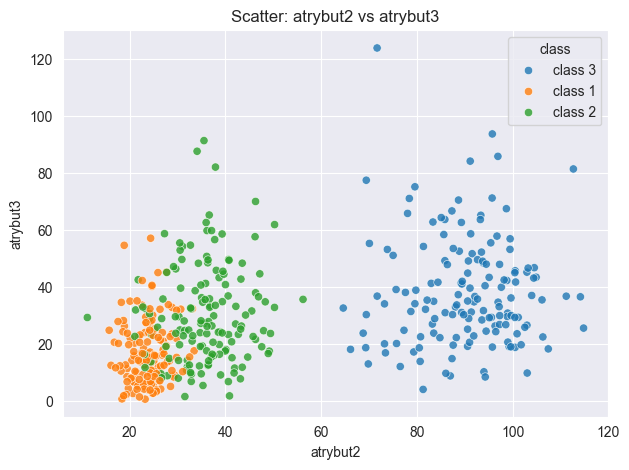

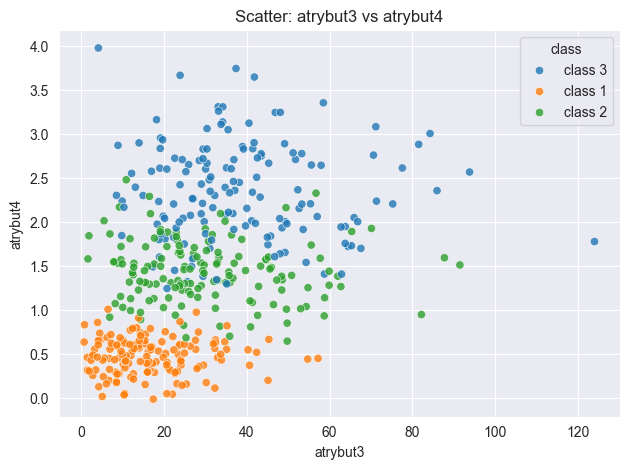

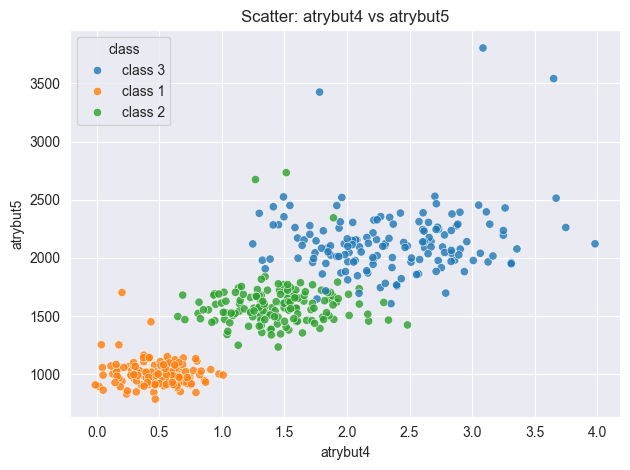

In [24]:

# ----------------------
# ZADANIE 2 – WIZUALIZACJE
# ----------------------

# Cechy numeryczne (bez 'class')
feature_cols = [c for c in df.columns if c != "class"]
num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()

# wybór 3 cech do histogramów/boxplotów (jeśli jest mniej, bierzemy wszystkie)
hist_cols = num_cols[:3]
box_cols = (num_cols[3:6] if len(num_cols) >= 6 else num_cols[:3])

# 1) Histogramy (min. 3 cechy) z podziałem na klasy
for col in hist_cols:
    plt.figure()
    for cls in sorted(df["class"].dropna().unique()):
        data = df.loc[df["class"] == cls, col].dropna()
        plt.hist(data, bins=15, alpha=0.6, label=str(cls))
    plt.title(f"Histogram: {col} (podział na klasy)")
    plt.xlabel(col)
    plt.ylabel("Liczność")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 2) Boxploty (min. 3 cechy), w tym przynajmniej jeden w podziale na klasy
for col in box_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

if len(num_cols) > 0:
    col0 = num_cols[0]
    plt.figure()
    sns.boxplot(x="class", y=col0, data=df)
    plt.title(f"Boxplot: {col0} w podziale na klasy")
    plt.tight_layout()
    plt.show()

# 3) Macierz wykresów punktowych wszystkich par atrybutów (pairplot)
# (może być ciężkie dla bardzo wielu cech – ograniczamy do max 5 numerycznych)
pair_cols = num_cols[:5]
if len(pair_cols) >= 2:
    sns.pairplot(df[pair_cols + ["class"]].dropna(), hue="class", corner=True)
    plt.show()

# 4) Scatter ploty (min. 4 wykresy) – wybieramy pary cech
pairs = []
for i in range(min(4, max(0, len(num_cols) - 1))):
    pairs.append((num_cols[i], num_cols[i+1]))

for x_col, y_col in pairs:
    plt.figure()
    sns.scatterplot(data=df, x=x_col, y=y_col, hue="class", alpha=0.8)
    plt.title(f"Scatter: {x_col} vs {y_col}")
    plt.tight_layout()
    plt.show()


### Wnioski z wizualizacji

1. **Zmienność i rozproszenie atrybutów**  
   - Na histogramach widać, które cechy mają szeroki zakres wartości (duża zmienność) oraz które są skupione (mała zmienność).  
   - Na boxplotach szerokość „pudełka” (IQR) i długość „wąsów” pokazują rozproszenie.

2. **Wartości odstające (outliers)**  
   - Na boxplotach punkty poza „wąsami” wskazują obserwacje odstające.  
   - Jeśli outlierów jest dużo w jednej klasie, może to świadczyć o heterogeniczności klasy albo błędach pomiaru.

3. **Symetria vs skośność rozkładów**  
   - Histogramy: rozkład symetryczny ma podobny „ogon” po obu stronach, skośność widać po długim ogonie z jednej strony.  
   - Boxploty: skośność widać po przesunięciu mediany w pudełku i nierównych wąsach.

4. **Korelacje między atrybutami**  
   - W macierzy wykresów punktowych/pairplot widać pary cech o zależności liniowej (punkty układają się w skośny pas) oraz pary słabo zależne (chmura bez kierunku).  
   - Silna korelacja może oznaczać redundancję informacji (cechy podobnie opisują obiekty).

5. **Atrybuty rozróżniające klasy**  
   - Scatter ploty z kolorem klasy: dobre cechy dają małe nakładanie się chmur punktów dla klas.  
   - Jeśli klasy mocno się nakładają, pojedynczy atrybut (lub para) jest słaby do rozdzielania.

6. **Różne skale cech i potrzeba standaryzacji**  
   - Jeśli zakresy cech są różne (np. jedna cecha w dziesiątkach, inna w setnych), widać to na histogramach/boxplotach.  
   - k-NN i k-means są wrażliwe na skalę → standaryzacja przed zadaniem 3 i 4 jest uzasadniona.


## Zadanie 3 (5 pkt) – Klasyfikacja

Wykonaj klasyfikację przy użyciu klasyfikatora k-NN dla wartości k ∈ {3, 5, 7, 9},

**Wykonaj:**

1. Usuń z danych **wszystkie wiersze zawierające braki** (NaN),
   
2. Wykonaj standaryzację wartości atrybutów opisujących.

2. Zbuduj:
   - macierz cech `X` – wszystkie atrybuty opisowe (bez `class`),
   - wektor etykiet `y` – wartości kolumny `class`.

3. Dokonaj podziału na zbiór uczący i testowy w stosunku 70/30 (30% danych w zbiorze testowym)

4. Dla k ∈ {1,5,9,11} zbuduj klasyfikatory k-NN
   Oblicz dokładność (accuracy) na zbiorze testowym dla każdego k.

5. Wyznacz najlepsze `k` (takie, dla którego klasyfikator wykazuje najwyższą dokładność).



**Wpisz wyniki do słownika `results`:**

- `cls_knn_k1_accuracy` (dokładność 1-NN)
- `cls_knn_k5_accuracy` (dokładność 5-NN)
- `cls_knn_k9_accuracy` (dokładność 9-NN)
- `cls_knn_k11_accuracy` (dokładność 11-NN)
- `cls_knn_best_k`     (najlepsze k)
- `cls_knn_best_accuracy` (najwyższa dokładność spośród k-NN)



In [27]:
from sklearn.metrics import accuracy_score

# ----------------------
# ZADANIE 3 – KLASYFIKACJA (k-NN)
# ----------------------

# 1) Usuń wiersze z brakami
df_cls = df.dropna().copy()

# 2) Cechy i etykiety
feature_cols = [c for c in df_cls.columns if c != "class"]
X = df_cls[feature_cols].values
y = df_cls["class"].values

# 3) Podział 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=indeks, stratify=y
)

# 4) Standaryzacja (dopasuj na train, zastosuj na test)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 5) Trening i ocena dla k
k_list = [1, 5, 9, 11]
acc_by_k = {}

for k_val in k_list:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(X_train_s, y_train)
    y_pred = knn.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    acc_by_k[k_val] = float(acc)

# 6) Najlepsze k (maksymalna dokładność; przy remisie wybieramy mniejsze k)
best_k = sorted(acc_by_k.items(), key=lambda t: (-t[1], t[0]))[0][0]
best_acc = acc_by_k[best_k]

print("Dokładności k-NN:", acc_by_k)
print("Najlepsze k:", best_k, "dokładność:", best_acc)


Dokładności k-NN: {1: 0.9925925925925926, 5: 1.0, 9: 1.0, 11: 1.0}
Najlepsze k: 5 dokładność: 1.0


In [28]:

# 9. Na końcu wpisz wszystkie wyliczone wartości do 'results'
#    TEN FRAGMENT KODU MASZ GOTOWY PONIŻEJ - WYSTARCZY ZAMIENIĆ
#    'None' W KAŻDEJ LINIJCE NA TWÓJ KOD

results["cls_knn_k1_accuracy"] = acc_by_k[1]
results["cls_knn_k5_accuracy"] = acc_by_k[5]
results["cls_knn_k9_accuracy"] = acc_by_k[9]
results["cls_knn_k11_accuracy"] = acc_by_k[11]
results["cls_knn_best_k"] = int(best_k)
results["cls_knn_best_accuracy"] = float(best_acc)

# sprawdzenie wartości
print("Wyniki CLS:")
for k in results:
    if k.startswith("cls_"):
        print(k, "=", results[k])


Wyniki CLS:
cls_knn_k1_accuracy = 0.9925925925925926
cls_knn_k5_accuracy = 1.0
cls_knn_k9_accuracy = 1.0
cls_knn_k11_accuracy = 1.0
cls_knn_best_k = 5
cls_knn_best_accuracy = 1.0


## Zadanie 4 (5 pkt) – Grupowanie metodą k-średnich

W tym zadaniu analizujemy jakość grupowania metodą **k-średnich** (k-means)
dla różnych liczności grup.

**Wykonaj:**

1. Użyj danych **po usunięciu wierszy z brakami** .

2. Zbuduj:
   - macierz cech `X_clu` – atrybuty opisujące (wszystkie kolumny oprócz `class`),
   - wektor klas `y_clu` – kolumna `class` (może być użyty jedynie pomocniczo
     do własnej analizy, nie wchodzi do wyników automatycznych).

3. Zastosuj standaryzację cech

4. Dla każdej wartości k z zestawu:
   $
      k \in \{2, 3, 4, 5\}
   $
   wykonaj grupowanie metodą k-średnich.

5. Dla każdego k oblicz **średnią odległość (Euklidesową) obiektów do centroidów, do których są przypisane**.

   Otrzymasz w ten sposób **4 wartości** średnich odległości,
   odpowiadający kolejno k = 2, 3, 4, 5

6. Wpisz te wartości do słownika `results` w polach:

- `clu_kmeans_mean_dist_k2`   
- `clu_kmeans_mean_dist_k3`  
- `clu_kmeans_mean_dist_k4`  
- `clu_kmeans_mean_dist_k5`  
 

(odpowiednio dla k = 2, 3, 4, 5).


In [30]:

# ----------------------
# ZADANIE 4 – GRUPOWANIE (K-MEANS)
# ----------------------

# 1) Dane po usunięciu braków (jak w Zad. 3)
df_clu = df.dropna().copy()

feature_cols = [c for c in df_clu.columns if c != "class"]
X_clu = df_clu[feature_cols].values
y_clu = df_clu["class"].values  # tylko pomocniczo (nie wchodzi do k-means)

# 2) Standaryzacja
scaler_clu = StandardScaler()
X_clu_s = scaler_clu.fit_transform(X_clu)

# 3) Dla k=2..5: dopasuj model i policz średnią odległość do przypisanego centroidu
mean_dist = {}

for k_val in [2, 3, 4, 5]:
    km = KMeans(n_clusters=k_val, random_state=indeks, n_init=10)
    labels = km.fit_predict(X_clu_s)
    centers = km.cluster_centers_

    # odległość każdego punktu do jego centroidu
    dists = np.linalg.norm(X_clu_s - centers[labels], axis=1)
    mean_dist[k_val] = float(dists.mean())

print("Średnie odległości do centroidów:", mean_dist)


Średnie odległości do centroidów: {2: 1.6529954407025673, 3: 1.3523231706458465, 4: 1.2623890276963439, 5: 1.2153453898870907}


In [31]:

# 9. Na końcu wpisz wszystkie wyliczone wartości do 'results'
#    TEN FRAGMENT KODU MASZ GOTOWY PONIŻEJ - WYSTARCZY ZAMIENIĆ
#    'None' W KAŻDEJ LINIJCE NA TWÓJ KOD

results["clu_kmeans_mean_dist_k2"] = mean_dist[2]
results["clu_kmeans_mean_dist_k3"] = mean_dist[3]
results["clu_kmeans_mean_dist_k4"] = mean_dist[4]
results["clu_kmeans_mean_dist_k5"] = mean_dist[5]

# sprawdzenie wartości
print("Wyniki CLU:")
for k in results:
    if k.startswith("clu_"):
        print(k, "=", results[k])


Wyniki CLU:
clu_kmeans_mean_dist_k2 = 1.6529954407025673
clu_kmeans_mean_dist_k3 = 1.3523231706458465
clu_kmeans_mean_dist_k4 = 1.2623890276963439
clu_kmeans_mean_dist_k5 = 1.2153453898870907


In [32]:
# ======================
# ZAPIS WYNIKÓW – TEGO KODU NIE ZMIENIAJ
# ======================

results_df = pd.DataFrame([results])
wyniki_filename = f"wyniki_{indeks}.csv"
wyniki_path = os.path.join(wyniki_filename)

results_df.to_csv(wyniki_path, index=False)
print(f"Zapisano wyniki do pliku: {wyniki_path}")

display(results_df)


Zapisano wyniki do pliku: wyniki_123456.csv


,imie,nazwisko,indeks,eda_num_rows,eda_num_attributes,eda_total_missing,eda_num_rows_with_missing,eda_num_column_with_missing,eda_num_classes,cls_knn_k1_accuracy,cls_knn_k5_accuracy,cls_knn_k9_accuracy,cls_knn_k11_accuracy,cls_knn_best_k,cls_knn_best_accuracy,clu_kmeans_mean_dist_k2,clu_kmeans_mean_dist_k3,clu_kmeans_mean_dist_k4,clu_kmeans_mean_dist_k5
0,IMIĘ,NAZWISKO,123456,450,6,0,0,0,3,0.992593,1.0,1.0,1.0,5,1.0,1.652995,1.352323,1.262389,1.215345


---
Pliki wynikowe wgraj we wskazane przez prowadzącego miejsce